In [1]:
import pandas as pd
import numpy as np
from scipy.stats import norm, t
from statsmodels.stats.proportion import proportions_ztest
import pingouin
import matplotlib.pyplot as plt

### Read data

In [2]:
late_shipments = pd.read_feather(r"..\data\late_shipments.feather")  
late_shipments = late_shipments[late_shipments["vendor_inco_term"] != "DDU"]

### Hypotheses

Trade deals often use a form of business shorthand in order to specify the exact details of their contract. These are International Chamber of Commerce (ICC) international commercial terms, or incoterms for short.

The late_shipments dataset includes a vendor_inco_term that describes the incoterms that applied to a given shipment. The choices are:

* EXW: "Ex works". The buyer pays for transportation of the goods.
* CIP: "Carriage and insurance paid to". The seller pays for freight and insurance until the goods board a ship.
* DDP: "Delivered duty paid". The seller pays for transportation of the goods until they reach a destination port.
* FCA: "Free carrier". The seller pays for transportation of the goods.


Perhaps the incoterms affect whether or not the freight costs are expensive. Test these hypotheses with a significance level of 0.01.

* H0: vendor_inco_term and freight_cost_group are independent.

* HA: vendor_inco_term and freight_cost_group are associated.



In [3]:
alpha = 0.01

In [4]:
late_shipments.head(3)

,id,country,managed_by,fulfill_via,vendor_inco_term,shipment_mode,late_delivery,late,product_group,sub_classification,...,line_item_quantity,line_item_value,pack_price,unit_price,manufacturing_site,first_line_designation,weight_kilograms,freight_cost_usd,freight_cost_groups,line_item_insurance_usd
0,36203.0,Nigeria,PMO - US,Direct Drop,EXW,Air,1.0,Yes,HRDT,HIV test,...,2996.0,266644.0,89.0,0.89,"Alere Medical Co., Ltd.",Yes,1426.0,33279.83,expensive,373.83
1,30998.0,Botswana,PMO - US,Direct Drop,EXW,Air,0.0,No,HRDT,HIV test,...,25.0,800.0,32.0,1.60,"Trinity Biotech, Plc",Yes,10.0,559.89,reasonable,1.72
2,69871.0,Vietnam,PMO - US,Direct Drop,EXW,Air,0.0,No,ARV,Adult,...,22925.0,110040.0,4.8,0.08,Hetero Unit III Hyderabad IN,Yes,3723.0,19056.13,expensive,181.57


freight_cost_groups  expensive  reasonable
vendor_inco_term                          
CIP                   0.320000    0.680000
DDP                   0.550000    0.450000
EXW                   0.583448    0.416552
FCA                   0.336364    0.663636


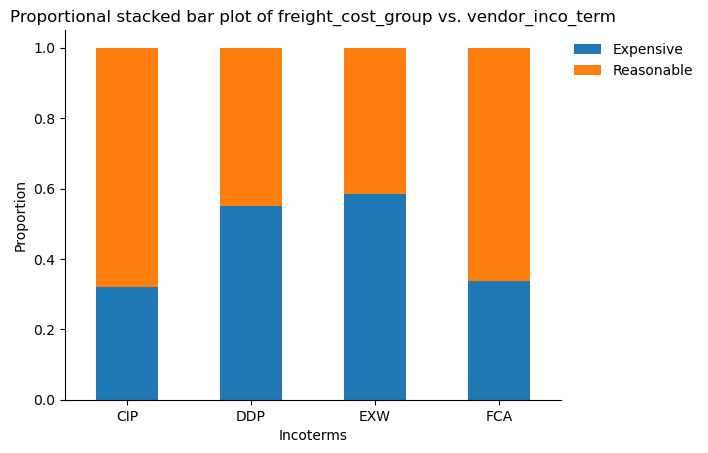

In [5]:
# Proportion of freight_cost_group grouped by vendor_inco_term
props = late_shipments.groupby('vendor_inco_term')['freight_cost_groups'].value_counts(normalize=True)

# Convert props to wide format
wide_props = props.unstack()

# Print wide_props
print(wide_props)

# Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term
#fig, ax = plt.subplots()
ax = wide_props.plot(kind='bar', stacked=True)
ax.spines.right.set_visible(False)
ax.spines.top.set_visible(False)
ax.legend(["Expensive", "Reasonable"], bbox_to_anchor=(1.0, 1.0), frameon=False)
ax.set_title("Proportional stacked bar plot of freight_cost_group vs. vendor_inco_term",color='black')
ax.set_xlabel("Incoterms")
ax.set_ylabel("Proportion")
plt.xticks(rotation=0)
plt.show()

The _chi-square independence test_ compares proportions of successes of one categorical variable across groups of another categorical variable.

In [6]:
# Determine if freight_cost_group and vendor_inco_term are independent
expected, observed, stats = pingouin.chi2_independence(data=late_shipments, 
                                                       x='vendor_inco_term', 
                                                       y='freight_cost_groups')

# Print results
print(stats[stats['test'] == 'pearson']) 
p_value = stats[stats['test'] == 'pearson']["pval"][0]
print("The p-value is:{}".format(p_value))

if p_value <= alpha:
    print("p_value <= alpha ({}). \nReject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are associated.".format(alpha))
else:
    print("Failed to reject H0")

      test  lambda     chi2  dof          pval    cramer     power
0  pearson     1.0  33.6426  3.0  2.357026e-07  0.183511  0.999424
The p-value is:2.3570258196712344e-07
p_value <= alpha (0.01). 
Reject the null hypothesis and conclude that vendor_inco_term and freight_cost_group are associated.
